In [5]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [6]:
filename = r"C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data\vr\assembling_gift_baskets_0_Beechwood_0_int_0_2021-10-26_12-40-39.hdf5"

f = h5py.File(filename, "r")

# f.keys()
f.attrs.keys()

print("Activity Definition: ", f.attrs['/metadata/activity_definition'])
print("ATUS Activity: ", f.attrs['/metadata/atus_activity'])
print("Filter Objects: ", f.attrs['/metadata/filter_objects'])
# print("Git Info: ", f.attrs['/metadata/git_info'])
print("Instance ID: ", f.attrs['/metadata/instance_id'])
# print("Object Body ID to Name: ", f.attrs['/metadata/obj_body_id_to_name'])
print("Physics Timestep: ", f.attrs['/metadata/physics_timestep'])
print("Render Timestep: ", f.attrs['/metadata/render_timestep'])
print("Scene ID: ", f.attrs['/metadata/scene_id'])
print("Start Time: ", f.attrs['/metadata/start_time'])
print("URDF File: ", f.attrs['/metadata/urdf_file'])
# print("VR Settings: ", f.attrs['/metadata/vr_settings'])

Activity Definition:  0
ATUS Activity:  assembling_gift_baskets
Filter Objects:  True
Instance ID:  0
Physics Timestep:  0.0033333333333333335
Render Timestep:  0.03333333333333333
Scene ID:  Beechwood_0_int
Start Time:  2021-10-26 12:40:39.957032
URDF File:  Beechwood_0_int_task_assembling_gift_baskets_0_0_fixed_furniture


In [7]:
f.keys()

<KeysViewHDF5 ['agent_actions', 'frame_data', 'goal_status', 'physics_data', 'vr']>

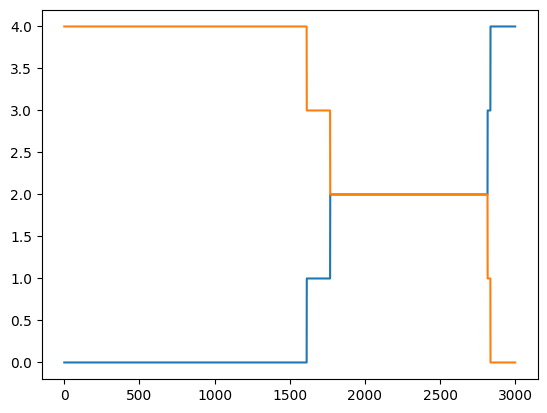

In [8]:
fig, ax = plt.subplots()
ax.plot(np.sum(f['goal_status']['satisfied'][:], axis=1))
ax.plot(np.sum(f['goal_status']['unsatisfied'][:], axis=1))

In [9]:
def explore_group(group, indent=''):
    for key in group.keys():
        item = group[key]
        print(indent + 'Key:', key)
        if isinstance(item, h5py.Dataset):
            # Dataset: print details
            explore_dataset(indent + key, item)
        elif isinstance(item, h5py.Group):
            # Group: Recursively explore
            print(indent + '{} is a Group'.format(key))
            explore_group(item, indent=indent + '    ')
        print()

In [21]:
f["agent_actions"]["vr_robot"].attrs

for attr_name in f["agent_actions"]["vr_robot"].attrs:
        print(f"    {attr_name}: {f["agent_actions"]["vr_robot"].attrs[attr_name]}")

SyntaxError: invalid syntax (3580541329.py, line 4)

In [1]:
""" This is a VR demo in a simple scene consisting of some objects to interact with, and space to move around.
Can be used to verify everything is working in VR, and iterate on current VR designs.
"""

import os

import pybullet as p
import pybullet_data

import igibson
from igibson.objects.articulated_object import ArticulatedObject
from igibson.render.mesh_renderer.mesh_renderer_cpu import MeshRendererSettings
from igibson.render.mesh_renderer.mesh_renderer_vr import VrSettings
from igibson.robots.behavior_robot import BehaviorRobot
from igibson.scenes.igibson_indoor_scene import InteractiveIndoorScene
from igibson.simulator import Simulator

# HDR files for PBR rendering
hdr_texture = os.path.join(igibson.ig_dataset_path, "scenes", "background", "probe_02.hdr")
hdr_texture2 = os.path.join(igibson.ig_dataset_path, "scenes", "background", "probe_03.hdr")
light_modulation_map_filename = os.path.join(
    igibson.ig_dataset_path, "scenes", "Rs_int", "layout", "floor_lighttype_0.png"
)
background_texture = os.path.join(igibson.ig_dataset_path, "scenes", "background", "urban_street_01.jpg")



# VR rendering settings
vr_rendering_settings = MeshRendererSettings(
    optimized=True,
    fullscreen=False,
    env_texture_filename=hdr_texture,
    env_texture_filename2=hdr_texture2,
    env_texture_filename3=background_texture,
    light_modulation_map_filename=light_modulation_map_filename,
    enable_shadow=True,
    enable_pbr=True,
    msaa=True,
    light_dimming_factor=1.0,
)
s = Simulator(mode="gui", rendering_settings=vr_rendering_settings, vr_settings=VrSettings(use_vr=False))

scene = InteractiveIndoorScene(
    "Rs_int", load_object_categories=["walls", "floors", "ceilings"], load_room_types=["kitchen"]
)
s.import_ig_scene(scene)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

objects = [
    ("jenga/jenga.urdf", (1.300000, -0.700000, 0.750000), (0.000000, 0.707107, 0.000000, 0.707107)),
    ("jenga/jenga.urdf", (1.200000, -0.700000, 0.750000), (0.000000, 0.707107, 0.000000, 0.707107)),
    ("jenga/jenga.urdf", (1.100000, -0.700000, 0.750000), (0.000000, 0.707107, 0.000000, 0.707107)),
    ("jenga/jenga.urdf", (1.000000, -0.700000, 0.750000), (0.000000, 0.707107, 0.000000, 0.707107)),
    ("jenga/jenga.urdf", (0.900000, -0.700000, 0.750000), (0.000000, 0.707107, 0.000000, 0.707107)),
    ("jenga/jenga.urdf", (0.800000, -0.700000, 0.750000), (0.000000, 0.707107, 0.000000, 0.707107)),
    ("table/table.urdf", (1.000000, -0.200000, 0.000000), (0.000000, 0.000000, 0.707107, 0.707107)),
    ("duck_vhacd.urdf", (1.050000, -0.500000, 0.700000), (0.000000, 0.000000, 0.707107, 0.707107)),
    ("duck_vhacd.urdf", (0.950000, -0.100000, 0.700000), (0.000000, 0.000000, 0.707107, 0.707107)),
    ("sphere_small.urdf", (0.850000, -0.400000, 0.700000), (0.000000, 0.000000, 0.707107, 0.707107)),
    ("duck_vhacd.urdf", (0.850000, -0.400000, 1.00000), (0.000000, 0.000000, 0.707107, 0.707107)),
]

for item in objects:
    fpath = item[0]
    pos = item[1]
    orn = item[2]
    item_ob = ArticulatedObject(fpath, scale=1)
    s.import_object(item_ob, use_pbr=False, use_pbr_mapping=True)
    item_ob.set_position(pos)
    item_ob.set_orientation(orn)

obj = ArticulatedObject(
    os.path.join(
        igibson.ig_dataset_path,
        "objects",
        "basket",
        "e3bae8da192ab3d4a17ae19fa77775ff",
        "e3bae8da192ab3d4a17ae19fa77775ff.urdf",
    ),
    scale=2,
)
s.import_object(obj)
obj.set_position_orientation([1.1, 0.300000, 1.0], [0, 0, 0, 1])

bvr_robot = BehaviorRobot(s)
s.import_behavior_robot(bvr_robot)
s.register_main_vr_robot(bvr_robot)
bvr_robot.set_position_orientation([0, 0, 1.5], [0, 0, 0, 1])

INFO:root:Importing iGibson (igibson module)
INFO:root:Assets path: C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/assets
INFO:root:Gibson Dataset path: C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/g_dataset
INFO:root:iG Dataset path: C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset
INFO:root:3D-FRONT Dataset path: C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/threedfront_dataset
INFO:root:CubiCasa5K Dataset path: C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/cubicasa_dataset
INFO:root:iGibson Key path: C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/igibson.key
INFO:root:Example path: C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\examples
INFO:root:Example config path: C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\examples\configs


torch is not available, falling back to rendering to memory(instead of tensor)


INFO:root:Loading C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/assets\models/mjcf_primitives/cube.obj
INFO:root:Loading C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/assets\models/mjcf_primitives/sphere8.obj
INFO:root:IndoorScene model: Rs_int
INFO:root:StaticIndoorScene scene: Rs_int
INFO:root:Category walls
INFO:root:Loading the following URDF template C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scenes\Rs_int\urdf\Rs_int_walls.urdf
INFO:root:Scale: [1. 1. 1.]
INFO:root:Number of splits: 1
INFO:root:Instantiating scene into the following urdfs:
INFO:root:C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scene_instances\20240410-195620_12428637931150610960_4384\walls_0.urdf
INFO:root:Category floors
INFO:root:Loading the following URDF template C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scenes\Rs_int\urdf\Rs_int_floors.urdf
INFO:root:Scale: [1. 1. 1.]
INFO:root:Number of splits: 1
INFO:root:I

SCENE NAME: Rs_int


INFO:root:Loading C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scene_instances\20240410-195620_12428637931150610960_4384\floors_0.urdf
INFO:root:Moving URDF to (pos,ori): [0. 0. 0.], [0. 0. 0. 1.]
INFO:root:Loading C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scene_instances\20240410-195620_12428637931150610960_4384\ceilings_0.urdf
INFO:root:Moving URDF to (pos,ori): [0. 0. 0.], [0. 0. 0. 1.]
INFO:root:Loading traversable graph
INFO:root:Loading C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scenes\Rs_int\shape/visual/wall_vm.obj
INFO:root:Loading C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scenes\Rs_int\shape/visual/floor_2_vm.obj
INFO:root:Loading C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scenes\Rs_int\shape/visual/floor_1_vm.obj
INFO:root:Loading C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scenes\Rs_int\shape/visual/floor_0_vm.obj
INFO:ro

In [2]:
s.step()

Texture:  C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scenes\Rs_int\shape/visual\../../material/wall/COMBINED.png
Texture:  C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scenes\Rs_int\shape/visual\../../material/wall/NORMAL.png
Texture:  C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scenes\Rs_int\shape/visual\../../material/floor_2/COMBINED.png
Texture:  C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scenes\Rs_int\shape/visual\../../material/floor_2/NORMAL.png
Texture:  C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scenes\Rs_int\shape/visual\../../material/floor_1/COMBINED.png
Texture:  C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scenes\Rs_int\shape/visual\../../material/floor_1/NORMAL.png
Texture:  C:\Users\bryan\Code\wkdir\behavior-vllm-eval\igibson\data/ig_dataset\scenes\Rs_int\shape/visual\../../material/floor_0/COMBINED.png
Texture:  C:\Users

In [3]:
s.step()